# Introduction to Python for data analysis
By Louis-François Bouchard

## Imports and Dataset Exploration

In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
# Load the dataset
iris = load_iris()

In [6]:
# Explore dataset

print("Dataset keys:", iris.keys())
print("\nShape of our data:",iris.get('data').shape)
print("\nLabels for our samples:",iris.get('target'))
print("With 0,1,2 being:",iris.get('target_names'))

print("\nFeature names for our 4 features per sample:\n",iris.get('feature_names'))


Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Shape of our data: (150, 4)

Labels for our samples: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
With 0,1,2 being: ['setosa' 'versicolor' 'virginica']

Feature names for our 4 features per sample:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Create dataframe and statistics

In [7]:
# Store ‘data’ and ‘features_names’ in distinct variables
data_iris = iris.get('data')
features_names_iris = iris.get('feature_names')

# Store into a panda dataframe
dataframe_iris = pd.DataFrame(data_iris, columns=features_names_iris)

print("Iris dataframe:\n", dataframe_iris)

dataframe_statistics = dataframe_iris.describe()

print("\nStatistics of our dataframe:\n",dataframe_statistics)

Iris dataframe:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Statistics of our data

## Extract first 50 rows

In [8]:
first_50_rows = dataframe_iris[:50]

## Are there any extreme sepal length values?

In [19]:
mean = dataframe_statistics.get(features_names_iris[0])[1]
std = dataframe_statistics.get(features_names_iris[0])[2]
sum((dataframe_iris.get(features_names_iris[0])-mean)/std > 3.9)

## Create a function to automate the process of finding extreme values from a PD column

In [56]:
def find_extreme_values(dataframe, column_name):
    """ Find if a specific PD column has extreme values
    Input: Panda dataframe and colum name for the column to check.
    Return: Number of extreme values.
    """
    dataframe_statistics = dataframe.describe()
    mean = dataframe_statistics.get(column_name)[1]
    std = dataframe_statistics.get(column_name)[2]
    print("Mean and std values for",column_name,":", mean,std)
    return sum((dataframe.get(column_name)-mean)/std > 3.9)

In [57]:
# Use the function for all other features....

for i in range(4):
    print("Number of extreme values for column",features_names_iris[i],":", find_extreme_values(dataframe_iris,features_names_iris[i]))

Mean and std values for sepal length (cm) : 5.843333333333335 0.8280661279778629
Number of extreme values for column sepal length (cm) : 0
Mean and std values for sepal width (cm) : 3.057333333333334 0.435866284936698
Number of extreme values for column sepal width (cm) : 0
Mean and std values for petal length (cm) : 3.7580000000000027 1.7652982332594667
Number of extreme values for column petal length (cm) : 0
Mean and std values for petal width (cm) : 1.199333333333334 0.7622376689603465
Number of extreme values for column petal width (cm) : 0


## Read about the boxplot function in matplotlib to get familiar with python documentation. 
### What does it tell us? https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

The doc tells us this is a function to display the statistics of our 1-D (or 2-D) data set.

A line shows the median of our data and the box starts and ends at the first and third quantile of our data respectively.

It shows flier points for values outside of this Q1-Q3 range (outliers).

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9de9c6b0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9de9c6bcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9de9c6b710>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9de9c88fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9de9c88910>,
 'means': []}

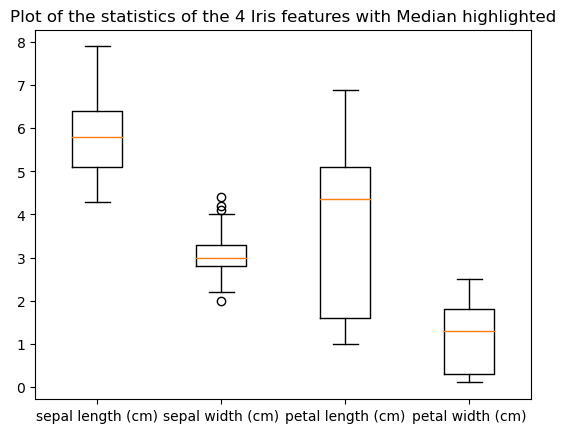

In [78]:
fig1, ax1 = plt.subplots()
ax1.set_title('Plot of the statistics of the 4 Iris features with Median highlighted')
ax1.boxplot(dataframe_iris.get(features_names_iris), widths=0.4, labels=features_names_iris)

In [101]:
# Save dataframe to csv and image to png

dataframe_iris.to_csv('iris_dataframe.csv')
fig1.savefig('figure_data_iris.png')